In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
sklearn.__version__
from sklearn.cluster import DBSCAN

In [2]:
url='/Users/user/Desktop/datathon/Reviews_Train_(1).csv'
df=pd.read_csv('/Users/user/Desktop/datathon/Reviews_Train_(1).csv')

In [3]:
df.info

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
18005  ditto reviewers wrote great location good serv...       4
18006  great location great beds stayed 3 nights, sta...       4
18007  underrated, good location modern comfort, hote...       4
18008  nice modern hotel small nice rooms hotel great...       4
18009  great hotel weekend getaway stayed hotel just ...       5

[18010 rows x 2 columns]>

In [4]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [5]:
df.isna().any()

Review    False
Rating    False
dtype: bool

In [6]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [7]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [8]:
df['Rating'] = df['Rating'].map({0: 0, 1: 0, 2: 0, 3: None, 4: 1, 5: 1})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18010 entries, 0 to 18009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  18010 non-null  object 
 1   Rating  16073 non-null  float64
dtypes: float64(1), object(1)
memory usage: 281.5+ KB


In [10]:
df.dropna(inplace=True)
df['Rating'] = df['Rating'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16073 entries, 0 to 18009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  16073 non-null  object
 1   Rating  16073 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 376.7+ KB


In [12]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1
5,love monaco staff husband stayed hotel crazy w...,1


In [13]:
! pip install nltk

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Descargar los recursos necesarios para NLTK (ejecutar solo una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocesamiento de texto
def preprocess_text(text):
    # Tokenización
    tokens = word_tokenize(text.lower())
    # Eliminación de stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Cargar los datos de entrenamiento
# Supongamos que tienes dos listas: una con los textos y otra con las etiquetas (0 para negativo, 1 para positivo)
#texts = ['This movie is great', 'I really enjoyed the concert', 'I hated the food', 'The service was terrible']
#labels = [1, 1, 0, 0]
texts= df['Review']
labels= df['Rating']

# Preprocesar los textos
preprocessed_texts = [preprocess_text(text) for text in texts]

preprocessed_texts

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['nice hotel expensive parking got good deal stay hotel anniversary , arrived late evening took advice previous review valet parking , check quick easy , little disappointed non-existent view room room clean nice size , bed comfortable woke stiff neck high pillow , soundproof like heard music room night morning loud bang door opening closing hear people talking hallway , maybe noisy neighbor , aveda bath product nice , goldfish stay nice touch taken advantage staying longer , location great walking distance shopping , overall nice experience pay 40 parking night ,',
 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle , start booked suite paid extra website description , suite bedroom bathroom standard hotel room , took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast , got kidding , embassy suit sitting room bathroom bedroom unlike kimpton call suite , 5

In [15]:
# Crear una representación vectorial de los textos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

X.shape

(16073, 43262)

# Clasificador Naive Bayes

In [16]:
%%time
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Entrenar el clasificador Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
precision = precision_score(y_test, predictions)
print('Precision:', precision)
recall = recall_score(y_test, predictions)
print('Recall:', recall)
f1_score = f1_score(y_test, predictions)
print('F1 Score:', f1_score)

Accuracy: 0.9446345256609642
Precision: 0.952837140751658
Recall: 0.9810318664643399
F1 Score: 0.9667289719626168
CPU times: user 18.1 ms, sys: 5.76 ms, total: 23.9 ms
Wall time: 26.7 ms


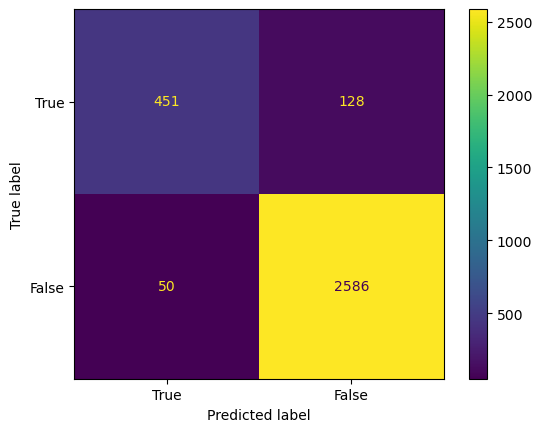

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

# Classificador SVM Support Vector Machine

In [18]:
%%time
from sklearn.svm import SVC

# Entrenar el clasificador SVM
classifier_2 = SVC(kernel='linear')
classifier_2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = classifier_2.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)
precision = precision_score(y_test, predictions)
print('Precision:', precision)
recall = recall_score(y_test, predictions)
print('Recall:', recall)

Accuracy: 0.9430793157076205
Precision: 0.9609169485155956
Recall: 0.970030349013657
CPU times: user 15.9 s, sys: 915 ms, total: 16.8 s
Wall time: 15.6 s


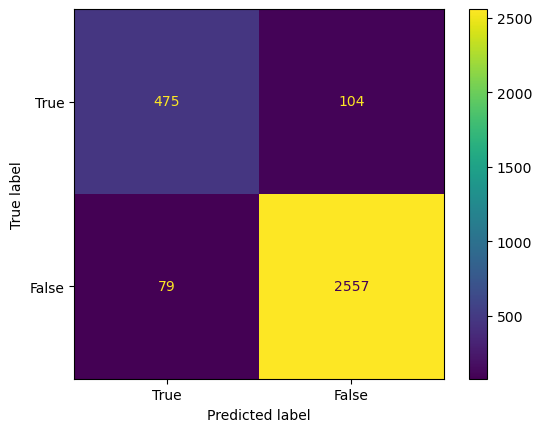

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()